<a href="https://colab.research.google.com/github/Aabha-J/Data-Science-ML-with-Pytorch-/blob/main/Linear_Regression_(with_multiple_dimensions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
data = sklearn.datasets.load_diabetes()
X, y = data['data'], data['target']

In [7]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train, X_test, y_train, y_test = [torch.tensor(data, dtype = torch.float32) for data in [X_train, X_test, y_train, y_test]]
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [9]:
class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim:int):
    super().__init__()
    self.linear = nn.Linear(in_features=input_dim, out_features=1)

  def forward(self, x):
    return self.linear(x)

In [10]:
input_size = X_train.shape[1]
input_size

10

In [23]:
model1 = LinearRegressionModel(10)

In [24]:
loss_fn = nn.MSELoss()
optimizer = optim.SGD(params = model1.parameters(), lr = 0.01)


In [14]:
X_train.shape, y_train.shape

(torch.Size([331, 10]), torch.Size([331]))

In [32]:
def train_test_loop(model: nn.Module, epochs:int, X_train, X_test, y_train, y_test):
  list_epoch = []
  list_train_loss = []
  list_test_loss = []

  for epoch in range(epochs):
    model.train()
    model.to(device)
    preds = model(X_train)

    loss = loss_fn(preds, y_train.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()

    with torch.inference_mode():
      test_pred = model(X_test)
      test_loss = loss_fn(test_pred, y_test.unsqueeze(1))

    if epoch % 10 == 0:
      list_epoch.append(epoch)
      list_train_loss.append(loss.item())
      list_test_loss.append(test_loss.item())

  return list_epoch, list_train_loss, list_test_loss

In [28]:
import matplotlib.pyplot as plt

def plot_loss_curves(epochs, train_losses, test_losses):
  plt.plot(epochs, train_losses, label='Train Loss', color='red')

  plt.plot(epochs, test_losses, label='Test', color='blue')

  # Add labels and legend
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.title('Loss')
  plt.legend()

  # Display the plot
  plt.show()


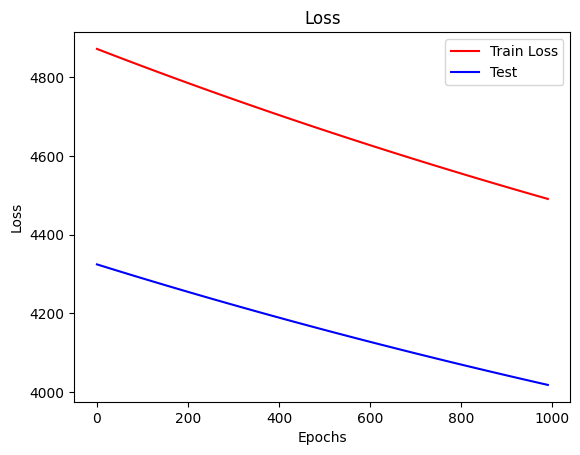

In [33]:
epochnums, train_losses, test_losses = train_test_loop(model1,1000, X_train, X_test, y_train, y_test)
plot_loss_curves(epochnums, train_losses, test_losses)